# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
This is classfication problem, as we have clear goal of finding students to might be helped by early intervention helping them successfully graduate. For this we will hence catagrious student into Pass or Failing group.


## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [39]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [40]:
print student_data.index
#print student_data.count
#print student_data.shape
#print student_data.size
#print student_data.axes
print len(student_data.index)
print student_data.columns.size
print student_data.columns
print "Count of student that passed {}.".format(student_data[student_data['passed']=='yes']['passed'].count())

print student_data.head(2)

RangeIndex(start=0, stop=395, step=1)
395
31
Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'passed'],
      dtype='object')
Count of student that passed 265.
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher   
1     GP   F   17       U     GT3       T     1     1  at_home    other   

   ...   internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...         no       no       4         3      4    1    1      3        6   
1  ...        yes       no       5         3      3    1    1      3        4   

  passed  
0     no  
1     no  

[2

In [41]:
# TODO: Calculate number of students
n_students = len(student_data.index)

# TODO: Calculate number of features
n_features = student_data.columns.size

# TODO: Calculate passing students
n_passed = student_data[student_data['passed']=='yes']['passed'].count()

# TODO: Calculate failing students
n_failed = student_data[student_data['passed']=='no']['passed'].count()


# TODO: Calculate graduation rate
grad_rate = np.float32(n_passed)/np.float32(n_students) * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [42]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head(2)

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher   
1     GP   F   17       U     GT3       T     1     1  at_home    other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       yes      yes        no       5         3     3    1    1      3   

  absences  
0        6  
1        4  

[2 rows x 30 columns]


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [43]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
y_all = y_all.replace(['yes', 'no'], [1, 0])

print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

num_train 300
num_test 95
Training set has 300 samples.
Testing set has 95 samples.


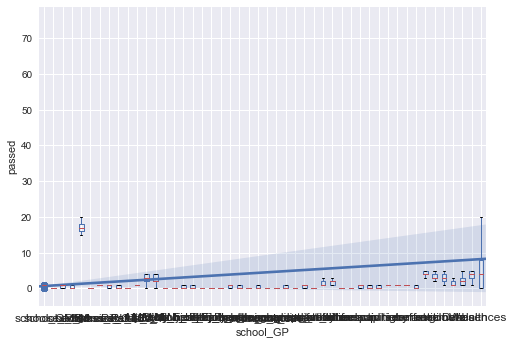

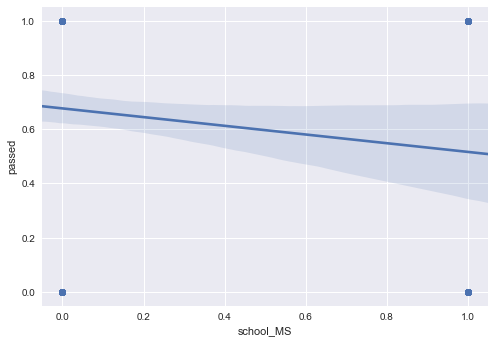

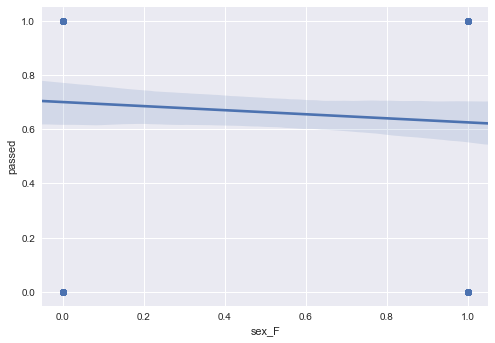

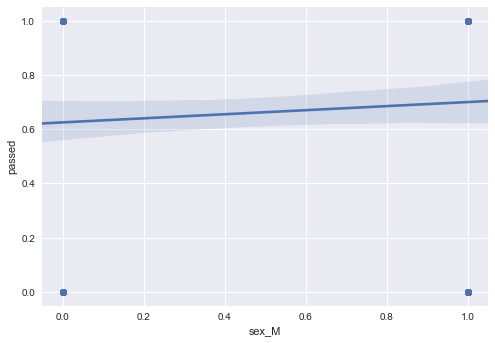

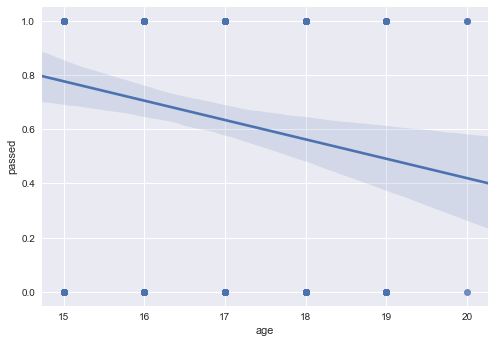

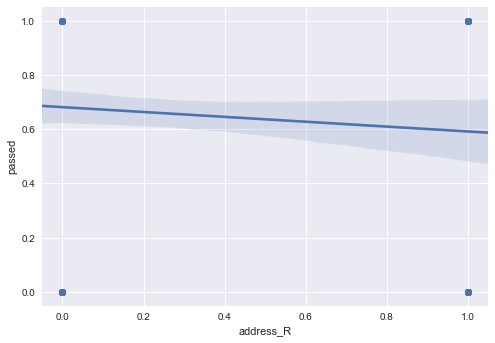

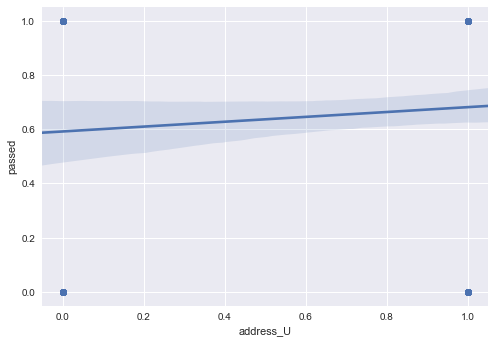

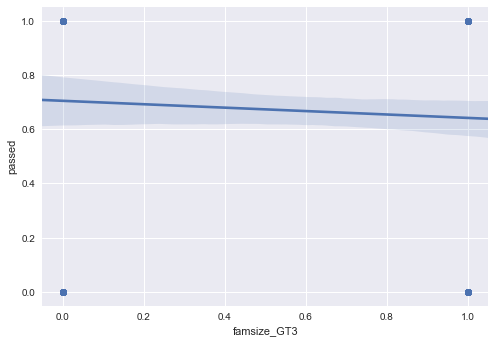

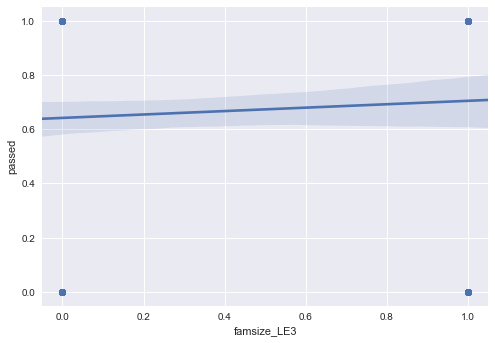

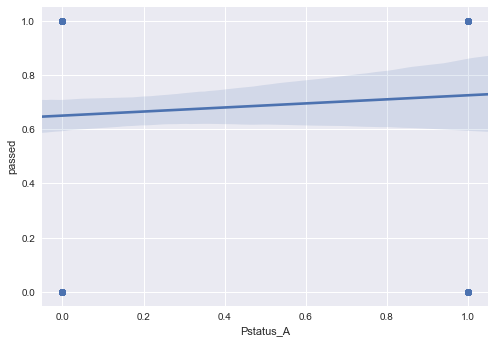

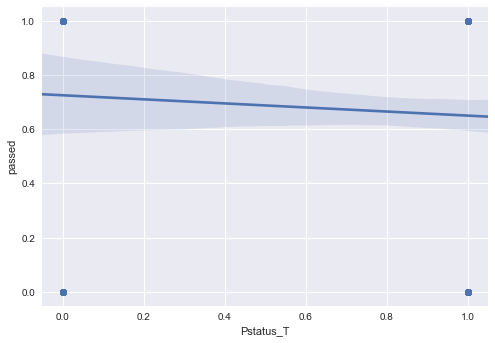

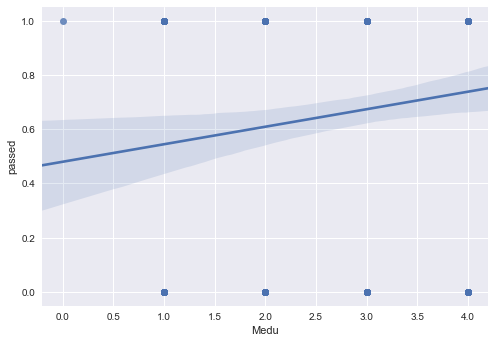

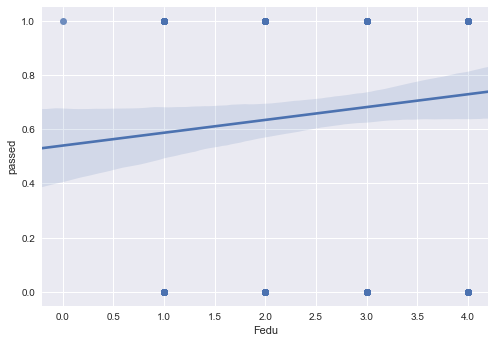

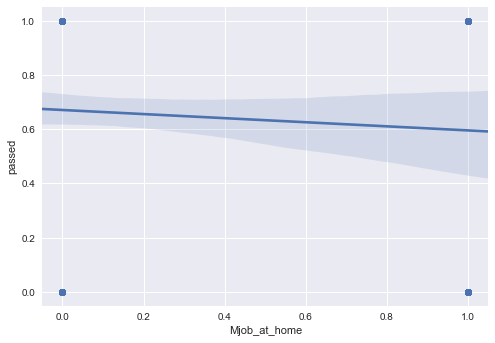

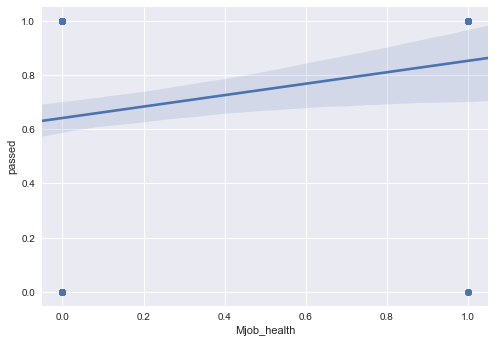

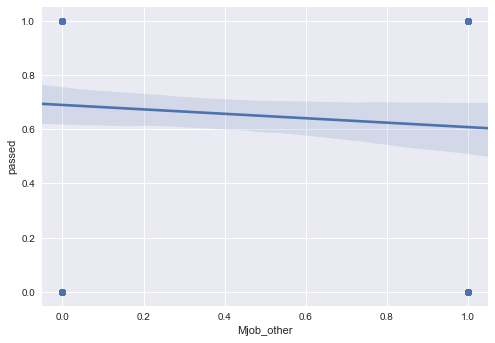

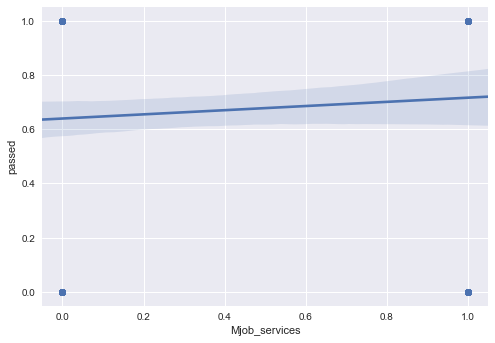

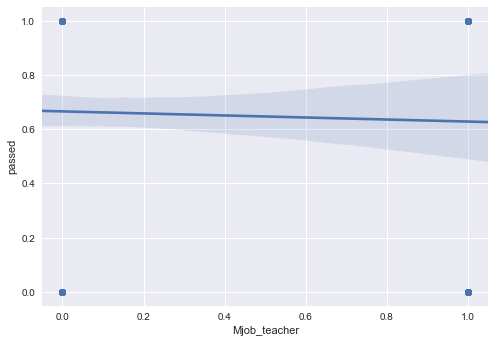

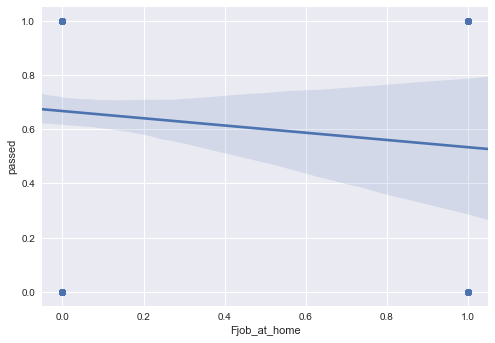

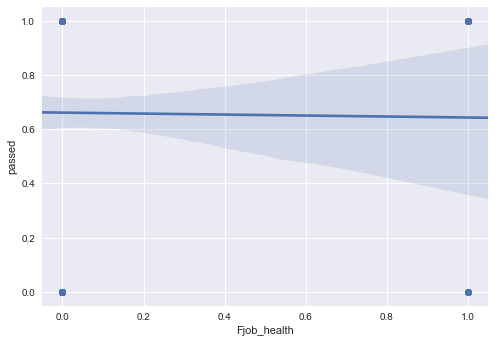

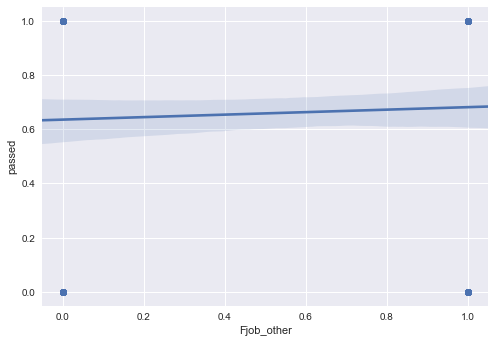

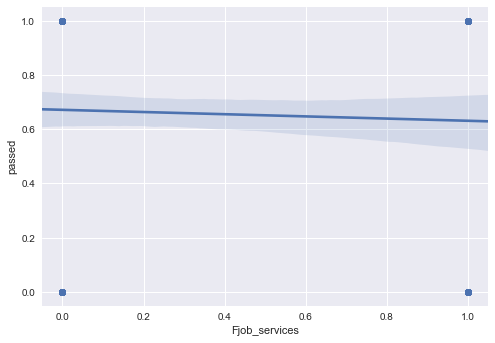

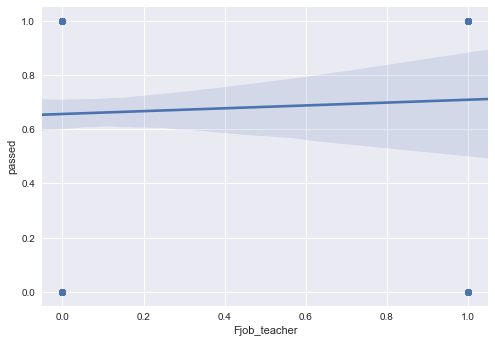

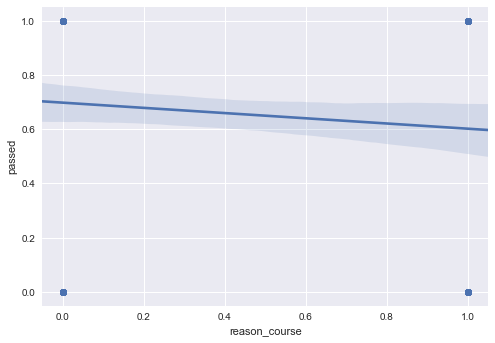

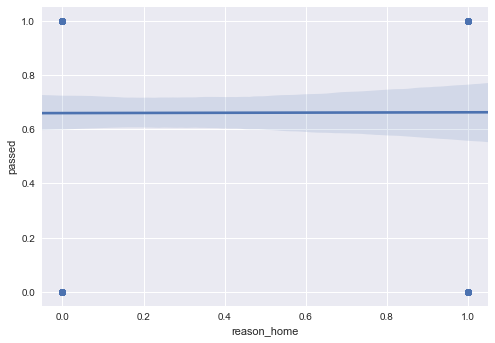

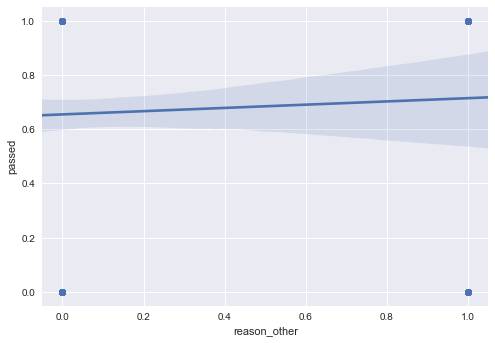

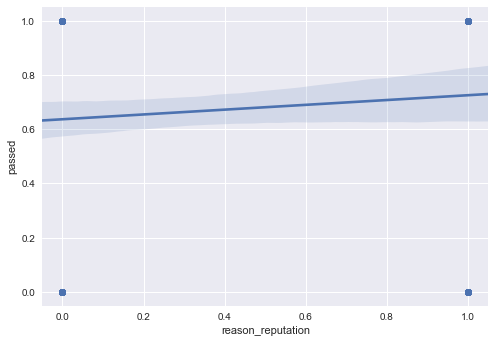

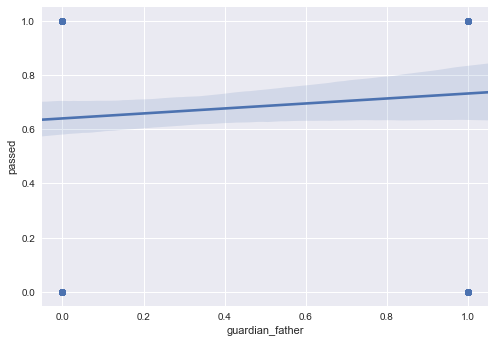

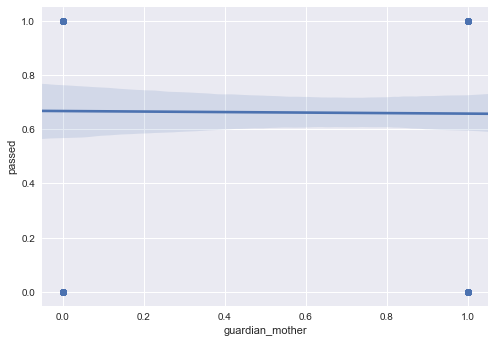

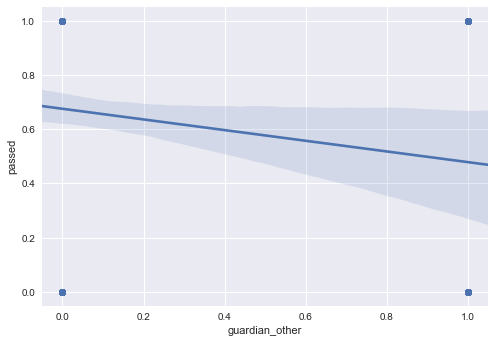

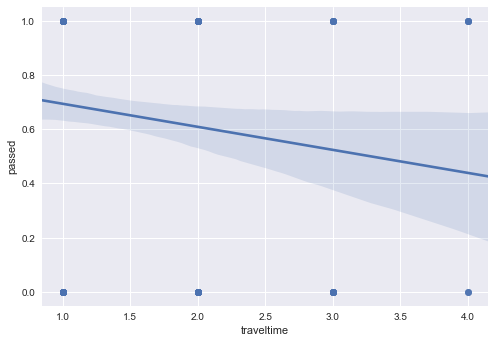

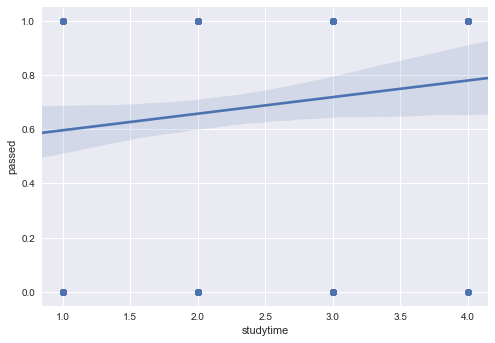

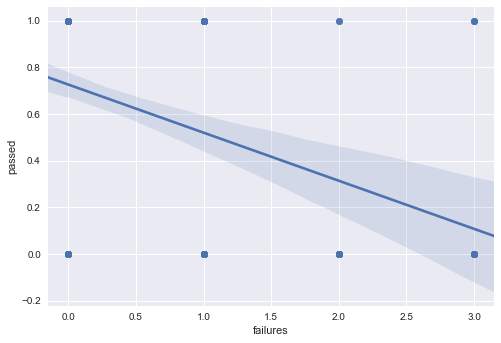

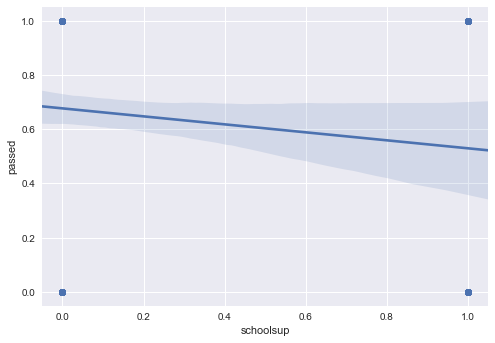

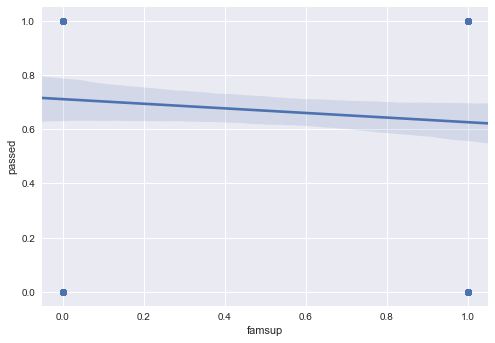

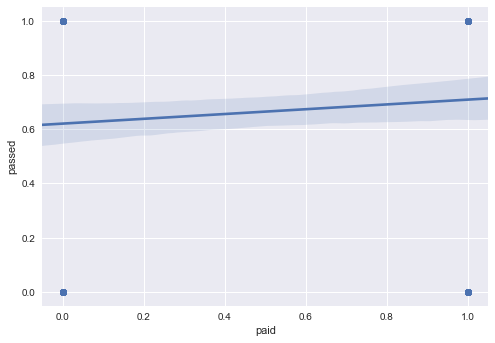

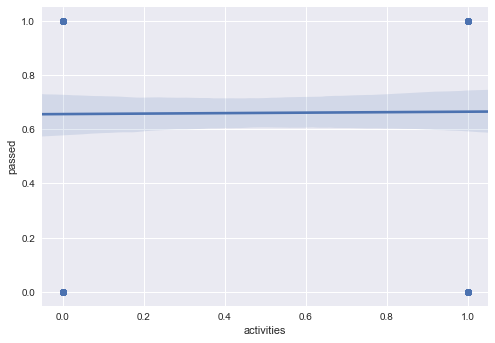

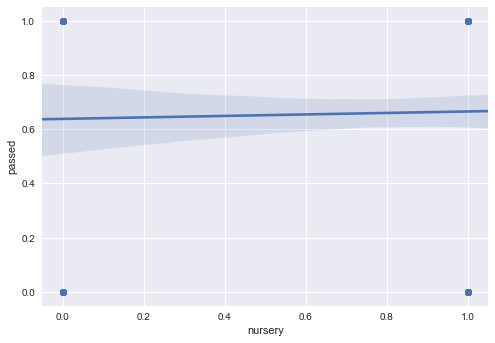

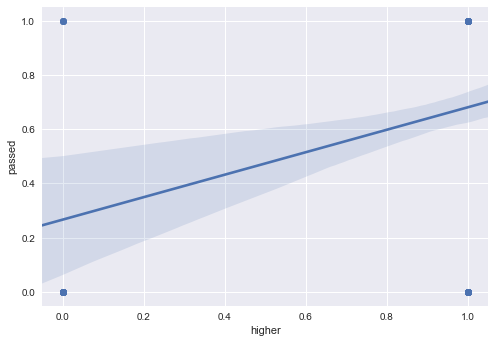

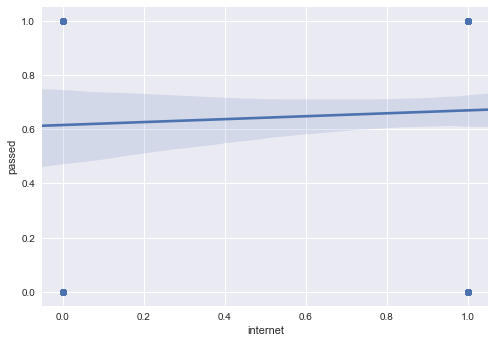

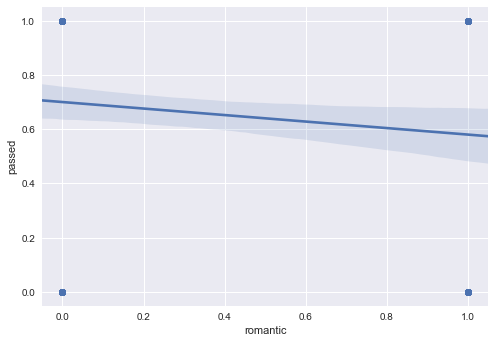

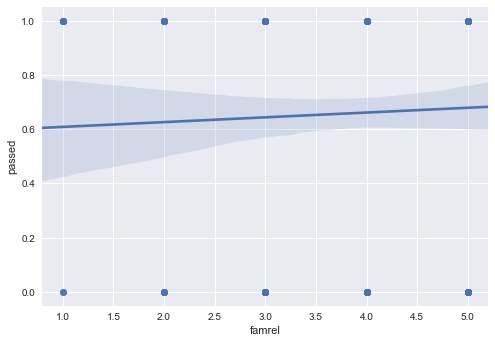

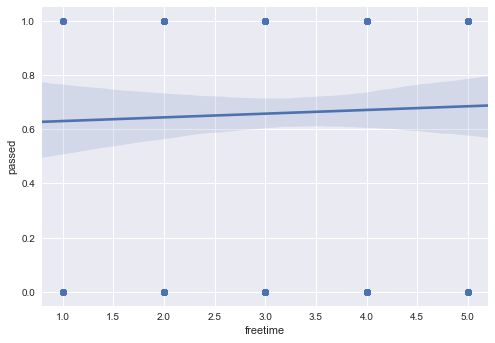

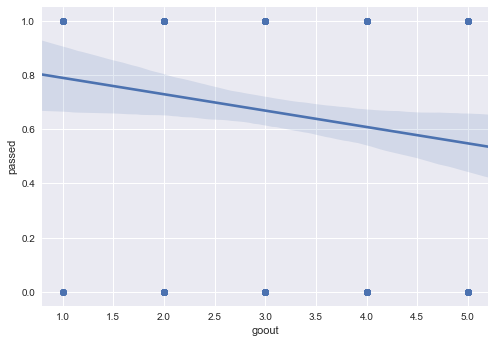

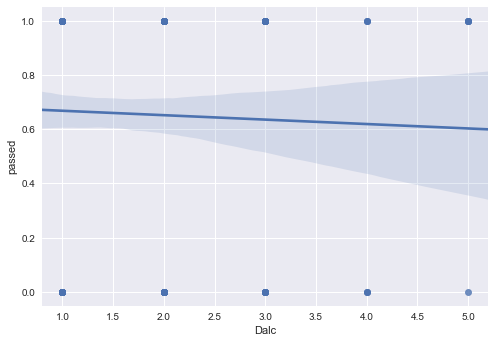

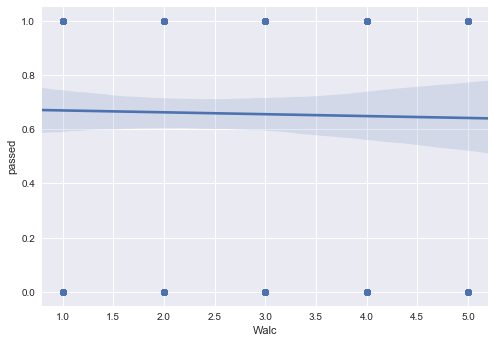

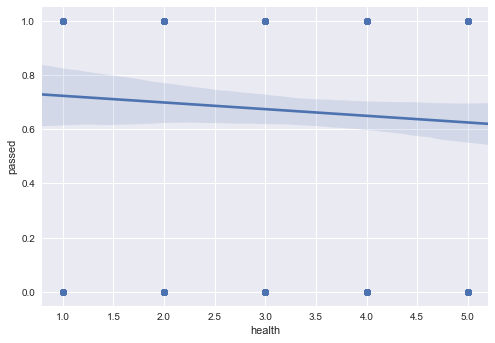

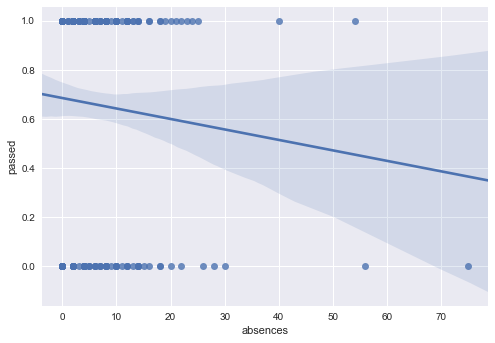

In [44]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=95, random_state=1)

# TODO: Set the number of training points
num_train = X_train.shape[0]

# Set the number of testing points
num_test = X_all.shape[0] - num_train

print 'num_train {}'.format(num_train)
print 'num_test {}'.format(num_test)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

#plot_data = student_data[['absences', 'failures', 'passed', 'goout']]

import matplotlib.pyplot as plt
import seaborn as sns

for var in X_train.columns:
    sns.regplot(X_train[var], y_train)
    plt.show()

# %matplotlib inline
# import matplotlib.pyplot as plt
# LARGE_FIGSIZE = (12, 8)
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(X_train, figsize=LARGE_FIGSIZE);
# print "DONE"

## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

### Model-1 - K Nearest Neighbors

The k-nearest neighbors algorithm (k-NN) is a non-parametric method and among the simple ML algorithms. The input consists of the k closest training examples in the given feature space. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). Mathematically, in the k-NN algorithm, given a parameter k and a distance or similarity function d, for a new instance q we obtain the algorithm output as a measure of centrality over the k closest items in the training data (i.e. the items with the k smallest d(q,xi)). For classification tasks, the basic measure of centrality is the mode of the k-NN

If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

KNN has the advantage of being a fairly simple algorithm. This might works well for low dimensionality space wth smooth & relatively well clustered data set. 

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. Hence the draw back of such lazy learning like K-NN is the memory requirements are much larger than eager learners (requiring storing all training data versus just a function) and making judgments take longer to compute than eager learners. But it has an advantages in local scale estimation and easy integration of additional training data.

At very high level as we add more data point the space complexity and run time complexity both increase by 1. Hence overall alogrithum complexy is O(n)

It will be helpful algorithum for this problem domain if most of the student's habits are all very close to points of pass/failing outcome.

### =======================================================================================


### Model 2 - Naive Bayes

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes is the best performing classification model for a given hypothesis space, data set & priori knowledge, the Bayes optimal classifier is computationally very costly. This is because the posterior probability P(h | D) must be computed for each hypothesis h ∈ H and combined with the prediction P(v | h) before v MAP can be computed. NB classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors). Maximum-likelihood training can be done by evaluating a closed-form expression taking linear time, rather than by iterative approximation as used for many other types of classifiers. Hence prediction runtime should be O(1) (no matter how many data points you used to create each feature's distribution, you're still comparing each novel data point feature to eah distribution once.

Bayes classifiers consider each feature independent from each other, which makes it resiliant to high-dimensional spaces, and therefore particularly good for datasets made predominantly from text.

Since we have large number of features in this data set, BayesianNB algorithm can be expected to performed particularly well compared to others.

### =======================================================================================

### Model 3 - Support Vector Machine

Given a set of training examples, SVM marked each as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. 

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

Runtime in training can be pretty variable depending on which kernal you use, but in any case optimizing for margin requires examining each point more than once as different boundaries are tried.  At least O(n\*log(n)), possibly O(n^2).

Prediction time is also comparatively slow, at least in the results table we have here.  Prediction appears to be roughly linear with respect to amount of training data [ O(n) ]

If allowed to make too complex a decision boundary, SVM can be prone to overfitting, but are generally a good candidate for using on data sets that have a high number of features.


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [45]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    ##return f1_score(target.values, y_pred, pos_label='yes')
    return f1_score(target.values, y_pred)

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [46]:

# %matplotlib inline
# import matplotlib.pyplot as plt

# LARGE_FIGSIZE = (12, 8)
# X_train_plot = X_train[['absences', 'failures', 'goout', 'Medu']]
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(X_train_plot, figsize=LARGE_FIGSIZE);

# print "DONE"
# print X_train.shape
# print y_train.shape

In [47]:
X_train.groupby('failures').hist

<bound method DataFrameGroupBy.hist of <pandas.core.groupby.DataFrameGroupBy object at 0x10eb6e090>>

In [48]:
X_train.describe()
X_train.boxplot()

In [49]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# clf_A_ALL = KNeighborsClassifier()
# train_classifier(clf_A_ALL, X_train, y_train)  # note: using entire training set here
# clf_A_S = KNeighborsClassifier()
# train_classifier(clf_A_S, X_train, y_train)  # note: using entire training set here
# clf_A_A = KNeighborsClassifier()
# train_classifier(clf_A_A, X_train, y_train)  # note: using entire training set here

clf_A = KNeighborsClassifier()
train_classifier(clf_A, X_train, y_train)  # note: using entire training set here

clf_B = GaussianNB()
train_classifier(clf_B, X_train, y_train)

clf_C = svm.SVC(random_state=29)
train_classifier(clf_C, X_train, y_train)


# from sklearn import tree
# from IPython.display import Image  
# dot_data = tree.export_graphviz(clf_B, out_file=None, feature_names=X_train, 
#                                 class_names=y_train, filled=True, rounded=True, special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png()) 

# TODO: Set up the training set sizes
# train_split = 3
# x = np.array_split(X_train, train_split)
# y = np.array_split(y_train, train_split)
# print len(x)
# print type(x)
# print type(x[0])

#X_train_chunck = pd.DataFrame()
#y_train_chunck = pd.DataFrame()
# for i in range(train_split):
#     X_train_chunck[i] = x[i]
#     y_train_chunck[i] = y[i]
#     print len(X_train_chunck[i]) 
#     print len(y_train_chunck[i])
#     print type(X_train_chunck[i])
#     print type(y_train_chunck[i])
###################################################
# X_train_set[]

# y_train_set = []
# for i in range(3) :
#     x = pd.DataFrame()
#     y = pd.DataFrame()
#     x = X_train[0:size_set]
#     y = y_train[0:size_set]
#     size_set = i*100
#     X_train_set.append(X_train[0:size_set])
#     y_train_set.append(y_train[0:size_set])

X_train_100 = X_train[0:100]
y_train_100 = y_train[0:100]

X_train_200 = X_train[0:200]
y_train_200 = y_train[0:200]

X_train_300 = X_train[0:300]
y_train_300 = y_train[0:300]

Trained model in 0.0014 seconds
Trained model in 0.0014 seconds
Trained model in 0.0069 seconds


In [50]:

# # TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf_A_ALL, X_train_100, y_train_100, X_test, y_test)
# print "=========================="
# train_predict(clf_A_S, X_train_100, y_train_100, X_test, y_test)
# print "---------------"
# train_predict(clf_A_S, X_train_200, y_train_200, X_test, y_test)
# print "---------------"
# train_predict(clf_A_S, X_train_300, y_train_300, X_test, y_test)
# print "=========================="
# train_predict(clf_A_A, X_train_100_A, y_train_100_A, X_test, y_test)
# print "---------------"
# train_predict(clf_A_A, X_train_200_A, y_train_200_A, X_test, y_test)
# print "---------------"
# train_predict(clf_A_A, X_train_300_A, y_train_300_A, X_test, y_test)
# print "=========================="
#train_predict(clf_B, X_train, y_train, X_test, y_test)
#train_predict(clf_C, X_train, y_train, X_test, y_test)

print "=========================="
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
print "--------------------------"
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
print "--------------------------"
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)
print "=========================="

train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
print "--------------------------"
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
print "--------------------------"
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)
print "=========================="

train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
print "--------------------------"
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
print "--------------------------"
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)
print "=========================="


Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0015 seconds
Made predictions in 0.0018 seconds.
F1 score for training set: 0.7883.
Made predictions in 0.0017 seconds.
F1 score for test set: 0.7727.
--------------------------
Training a KNeighborsClassifier using a training set size of 200. . .
Trained model in 0.0008 seconds
Made predictions in 0.0031 seconds.
F1 score for training set: 0.8345.
Made predictions in 0.0019 seconds.
F1 score for test set: 0.7971.
--------------------------
Training a KNeighborsClassifier using a training set size of 300. . .
Trained model in 0.0011 seconds
Made predictions in 0.0063 seconds.
F1 score for training set: 0.8558.
Made predictions in 0.0026 seconds.
F1 score for test set: 0.7681.
Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0016 seconds
Made predictions in 0.0007 seconds.
F1 score for training set: 0.8346.
Made predictions in 0.0012 seconds.
F1 score for test set: 0.74

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - KNeighborsClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.0010               |    .0015               | 0.7883           | 0.7727          |
| 200               |    0.0007               |    .0026               | 0.8345           | 0.7971          |
| 300               |    0.0007               |    .0067               | 0.8558           | 0.7681          |

** Classifer 2 - GaussianNB **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.0009               |    .0004               | 0.7879           | 0.7402          |
| 200               |    0.0009               |    .0004               | 0.7879           | 0.6446          |
| 300               |    0.0013               |    .0009               | 0.7921           | 0.6720          |

** Classifer 3 - SVC **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.0012               |    .0009               | 0.8591           | 0.8333          |
| 200               |    0.0033               |    .0027               | 0.8581           | 0.8408          |
| 300               |    0.0069               |    .0047               | 0.8584           | 0.8462          |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
As outined above we evaluated 3 common classifier algorithms KNN, GaussianNB & SVM over the same sample dataset.
While all 3 algorithms FT for training set where close to 0.80s when provided with the full training data. 
Based on the F1 Score GaussianNB seems to perform poorly specially even with relatively high training dataset, test score was in only high 60s while both KNN and SVM showed high f1 score of close to .80 specially SVM provided the highest accuracy of all, F1 of 0.8584/0.8462 in both train/test sets.

Another point to note the between the 3 models is the difference in run time. 
I think that NB provided much better results compared sepcially when compared to SVC. In both training time and prediction time, NB runs fastest and data size seems to have no affect to execution time. A big plus point specially if one has big data size needing fast processing and preditable execution time interval.

SVM seems to perform very poorly with data growth rate with almost doubling with similar increase in size. If data set is going to be larger SVM might not be a feasable at this rate. 

It is hard to choose between SVM and NB based on 2 different +/- points as outlined. For now while SVM is slow and getting with risk of getting even slower, I still think it is a good fit for the given dataset though, based on its accuracy.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

In general SVM attempts to classified the given data into two different groups ie if the data are linearly separable, into completely into their groups by a dividing hyperplane, then SVM goals is to find the equation that best divides the groups.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [51]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import sklearn

print sklearn.__version__

# from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix

# TODO: Create the parameters list you wish to tune
#parameters = {'n_estimators':( 115,110), 'learning_rate':np.arange(0.1,5,0.1), 'algorithm': ['SAMME.R']}
#parameters = [{'kernel': ['rbf']},{'kernel': ['linear']}] 
parameters = [{
         'C': [0.5, 1.0, 2.0, 5.0, 10.0, 100.0],
         'kernel': ['rbf', 'linear'],
         'gamma': ['auto',1.0, 5.0, 10.0]
        }]

#print estimator.get_params().keys(X_test)
clf = svm.SVC()

# TODO: Make an f1 scoring function using 'make_scorer' 
#f1_scorer = make_scorer(f1_score, pos_label='yes')
f1_scorer = make_scorer(f1_score, pos_label=1)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

0.18.1
Made predictions in 0.0041 seconds.
Tuned model has a training F1 score of 0.8584.
Made predictions in 0.0017 seconds.
Tuned model has a testing F1 score of 0.8462.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

Made predictions in 0.0041 seconds.
Tuned model has a training F1 score of 0.8584.
Made predictions in 0.0017 seconds.
Tuned model has a testing F1 score of 0.8462.
            - vs - 
Training a SVC set size of 300...
Trained model in 0.0057 seconds
Made predictions in 0.0041 seconds.
Model has a testing F1 score of 0.8584.
Made predictions in 0.0017 seconds.
Model has a testing F1 score of 0.8462.

I didn't see much improvement in F1 score or prediction time after tuning the SVC on the given dataset. Guess we need more data to verify this.

But in general I got the idea about how to tune and look at scores to find the best model and parameters.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.